In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
#Generators
train_data=keras.utils.image_dataset_from_directory(
        directory='CATDOGDATA/train',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)
validation_data=keras.utils.image_dataset_from_directory(
        directory='CATDOGDATA/test',
        labels='inferred',
        label_mode='int',
        batch_size=32,
        image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [3]:
#Normalize
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label


train_data=train_data.map(process)
validataion_data=validation_data.map(process)

In [11]:
#Create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))          
model.add(Dropout(0.1))
          
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
18/18 [==============================] - 19s 979ms/step - loss: 6.2930 - accuracy: 0.5404 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 17s 940ms/step - loss: 6.8100 - accuracy: 0.5440 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 17s 940ms/step - loss: 7.6444 - accuracy: 0.4973 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 17s 947ms/step - loss: 7.5405 - accuracy: 0.5009 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 18s 959ms/step - loss: 7.3323 - accuracy: 0.5153 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 17s 943ms/step - loss: 7.6167 - accuracy: 0.4991 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 18s 950ms/step - loss: 7.5234 - accuracy: 0.5063 - val_loss: 7.6246 - val_accuracy: 0.5000

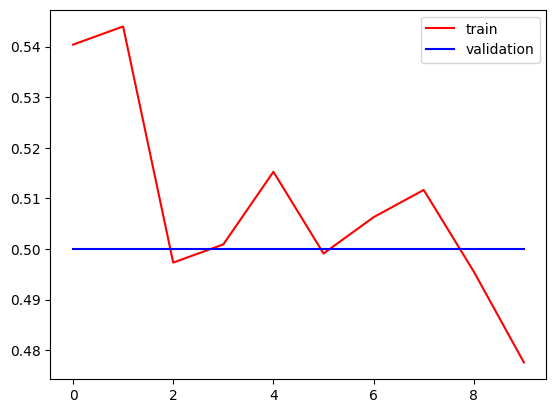

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

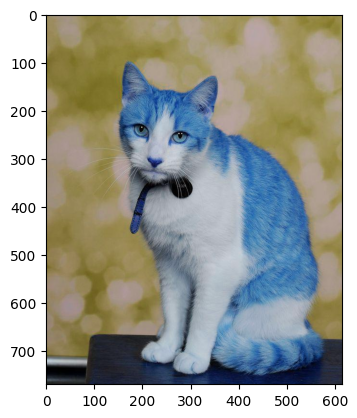

In [36]:
import cv2
test_img=cv2.imread('CATDOGDATA/test/cats/cat_1.jpg')
# print(test_img)
plt.imshow(test_img)
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_img.shape
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)